
## Minimum Norm Solution






## Inputs



(2, 'i_h2i_rate')

(3, 'i_pci_rate')

(5, 'i_ngi_rate')

(6, 'i_o2_volfract')

(8, 'i_h2_temp')

(9, 'i_hbtemp')

(10, 'i_wind_rt')


## Outputs


* desired output requirements 


(27, 'o_tgt')

(29, 'o_hmt')

(39, 'o_prod_rt')

(40, 'o_fta')



In [1]:

## !pip install xgboost
## !pip install onnxmltools
## !pip install onnxruntime
## !pip install pandas
## !pip install scikit-learn
## !pip install matplotlib
## !pip install seaborn
## !pip install mlxtend
## ! pip install skl2onnx



In [2]:


import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import functorch


import torch.optim as optim


from numpy.random import normal
from scipy.stats import norm
import scipy.stats as stats
from numpy import hstack
from numpy import vstack
from numpy import exp
from sklearn.neighbors import KernelDensity

##from typing import Optional

from torch import Tensor


from torch.utils.data import TensorDataset, DataLoader

from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

import os, json, time, uuid


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





In [4]:


import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import onnxmltools
from onnxmltools.convert.xgboost.operator_converters.XGBoost import (
    convert_xgboost)
from onnxmltools.convert import convert_xgboost as convert_xgboost_booster


from zipfile import ZipFile
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn, to_onnx, update_registered_converter
from skl2onnx.common.shape_calculator import (
    calculate_linear_classifier_output_shapes,
    calculate_linear_regressor_output_shapes)


# Import the ONNX runtime environment
import onnxruntime as rt




In [5]:

import PDFshapingUtils as PDF_tk


In [6]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [7]:

PDFshapingOBJ.read_csv_file_with_pandas('CFD.16.2025.csv')


In [8]:

PDFshapingOBJ.CFD_raw_data


,index,case name,i_h2i_rate,i_pci_rate,i_wpi_rate,i_ngi_rate,i_o2_volfract,i_ng_temp,i_h2_temp,i_hbtemp,...,o_h2o_sollos,o_feo_sollos,o_hm_rt,o_mw_rt,o_wf_rt,o_hm_h2share,o_mw_h2share,o_wf_h2share,o_prod_rt,o_fta
0,1,H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HB...,0,0,0,120,21,300,0,1200,...,20.0,44.9,122.0,264.0,687.0,31.6,26.7,63.5,4050.0,1800.0
1,2,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,18.5,52.6,122.0,265.0,684.0,27.9,23.4,60.6,4060.0,1850.0
2,3,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.6,50.9,123.0,266.0,690.0,27.7,23.5,60.8,4080.0,1850.0
3,4,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.2,124.0,268.0,690.0,27.7,23.2,60.6,4090.0,1850.0
4,5,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.4,124.0,268.0,695.0,27.7,23.2,60.7,4110.0,1850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,18.7,40.3,353.0,763.0,2190.0,34.0,20.5,56.7,11700.0,2380.0
4995,4996,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,18.7,40.7,353.0,763.0,2190.0,33.8,20.4,56.8,11700.0,2310.0
4996,4997,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,19.2,37.5,353.0,763.0,2230.0,33.6,20.4,57.1,11700.0,2380.0
4997,4998,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,17.6,39.8,355.0,768.0,2220.0,34.0,20.0,55.7,11800.0,2310.0


In [9]:

PDFshapingOBJ.print_headers_list()


['index', 'case name', 'i_h2i_rate', 'i_pci_rate', 'i_wpi_rate', 'i_ngi_rate', 'i_o2_volfract', 'i_ng_temp', 'i_h2_temp', 'i_hbtemp', 'i_wind_rt', 'i_blastH2O', 'i_BdnH2O', 'i_sgi_rate', 'i_sgtemp', 'i_sgi_H2COratio', 'i_sgi_ReProRatio', 'o_tuy_velo', 'o_tuy_temp', 'o_burn', 'o_delp', 'o_co_vf', 'o_co2_vf', 'o_h2_vf', 'o_n2_vf', 'o_co_util', 'o_h2_util', 'o_tgt', 'o_coke_rt', 'o_hmt', 'o_co2_sollos', 'o_h2o_sollos', 'o_feo_sollos', 'o_hm_rt', 'o_mw_rt', 'o_wf_rt', 'o_hm_h2share', 'o_mw_h2share', 'o_wf_h2share', 'o_prod_rt', 'o_fta']
41
(0, 'index')
(1, 'case name')
(2, 'i_h2i_rate')
(3, 'i_pci_rate')
(4, 'i_wpi_rate')
(5, 'i_ngi_rate')
(6, 'i_o2_volfract')
(7, 'i_ng_temp')
(8, 'i_h2_temp')
(9, 'i_hbtemp')
(10, 'i_wind_rt')
(11, 'i_blastH2O')
(12, 'i_BdnH2O')
(13, 'i_sgi_rate')
(14, 'i_sgtemp')
(15, 'i_sgi_H2COratio')
(16, 'i_sgi_ReProRatio')
(17, 'o_tuy_velo')
(18, 'o_tuy_temp')
(19, 'o_burn')
(20, 'o_delp')
(21, 'o_co_vf')
(22, 'o_co2_vf')
(23, 'o_h2_vf')
(24, 'o_n2_vf')
(25, 'o_co_ut

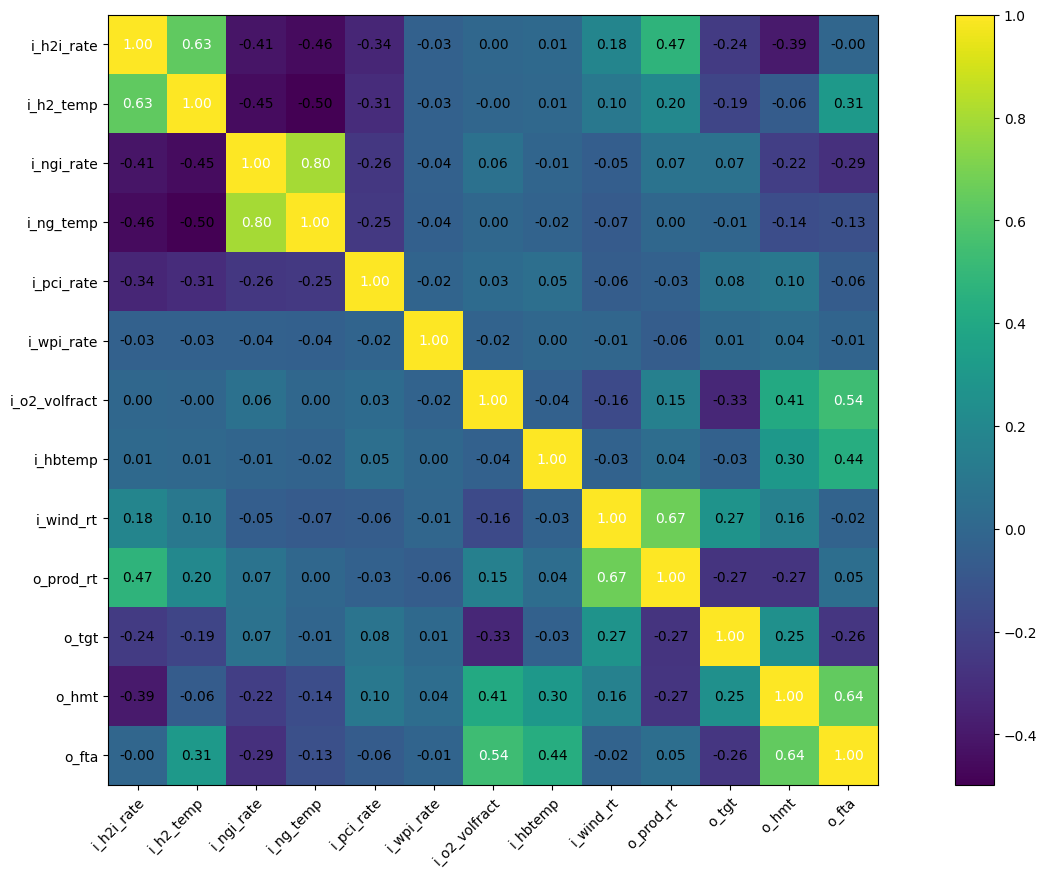

In [10]:


PDFshapingOBJ.list_of_selected_column_names = ['i_h2i_rate','i_h2_temp','i_ngi_rate','i_ng_temp','i_pci_rate',
                    'i_wpi_rate','i_o2_volfract',
                    'i_hbtemp','i_wind_rt','o_prod_rt', 'o_tgt', 'o_hmt','o_fta']



PDFshapingOBJ.print_correlation_coefficients()


In [11]:

PDFshapingOBJ.convert_pd_data_to_numpy()


[[1
  'H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-7_SGI-0_SGT-0_SGC_0 '
  0 ... 63.5 4050.0 1800.0]
 [2
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-1_SGI-0_SGT-0_SGC_0 '
  0 ... 60.6 4060.0 1850.0]
 [3
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  0 ... 60.8 4080.0 1850.0]
 ...
 [4997
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1600_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 57.1 11700.0 2380.0]
 [4998
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-3_SGI-0_SGT-0_SGC_0 '
  30 ... 55.7 11800.0 2310.0]
 [4999
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 56.2 11800.0 2310.0]]
(4999, 41)


In [12]:

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs = [  2, 3, 5, 6, 8, 9, 10   ] , 
                   outputs= [ 27, 29, 39, 40 ]   
)


## inputs = [ 2, 3, 5, 6, 8, 9, 10  ]          ## the full 7



7
4


In [13]:

print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


(4999, 7)
(4999, 4)


In [14]:

PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42


In [15]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [16]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [17]:

from sklearn.decomposition import PCA

# Instantiate PCA to reduce to 4 components
pca = PCA(n_components=4)

# Fit on training data and transform both train and test
X_train_pca = pca.fit_transform(PDFshapingOBJ.X_train)
X_test_pca  = pca.transform(PDFshapingOBJ.X_test)

# Replace the original inputs with PCA-reduced versions
PDFshapingOBJ.X_train = X_train_pca
PDFshapingOBJ.X_test  = X_test_pca





In [18]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 4)
(1000, 4)
(3999, 4)
(1000, 4)


In [19]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [20]:

PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [21]:


PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl



## Model Forward ( 7x4 )


In [22]:

n_inputs  = 4     ## 7
n_outputs = 4




#############################################################
##   F1      plus       F2
## Linear     +      Nonlinear

class F1plusF2_SIO_Forward(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations,  device='cuda'):
        super().__init__()
        self.device = device
        
        ## self.x_means      = x_means
        ## self.x_deviations = x_deviations
        ## self.y_means      = y_means
        ## self.y_deviations = y_deviations
        
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)
        
        
        
        ## F1
        self.f1_linear1 = nn.Linear(n_inputs, n_outputs)       
        
        ## F2
        self.f2_linear1 = nn.Linear(n_inputs, 10)
        self.f2_act1    = nn.Sigmoid()                    ## Tanh()                       
        self.f2_linear2 = nn.Linear(10, n_outputs)       
        self.f2_dropout = nn.Dropout(0.25)
        
        # Move model to device
        self.to(self.device)
        
        
    ## perform inference
    def forward(self, x):
        x = x.to(self.device)
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_dropout(f2)
        f2 = self.f2_linear2(f2)
        
        
        y_scaled   = f1 + f2
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    




In [23]:

n_inputs  = 4     ## 7
n_outputs = 4





    
class ResidualNet_Forward(nn.Module):
    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1, device='cuda'):
        
        super().__init__()
        self.device = device
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)

     
        self.fc1  = nn.Linear(n_inputs, 64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(64, 64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(64, n_outputs)

        # If input_dim ≠ 64, project for residual addition
        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()
        
        # Move model to device
        self.to(self.device)
        

    def forward(self, x):
        x  = x.to(self.device)
        x  = (x - self.x_means) / self.x_deviations
        x0 = self.input_proj(x)
        x1 = self.dropout1(self.act1(self.fc1(x)))
        x2 = self.dropout2(self.act2(self.fc2(x1)))
        x_res = x2 + x0
        y_scaled = self.fc3(x_res)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    

    


In [24]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## model_Forward     = F1plusF2_SIO_Forward(

model_Forward     =     F1plusF2_SIO_Forward(
                         PDFshapingOBJ.x_means, 
                         PDFshapingOBJ.x_deviations, 
                         PDFshapingOBJ.y_means, 
                         PDFshapingOBJ.y_deviations,
                         device=device  # pass device into the model
    
)

optimizer = optim.Adam(model_Forward.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()



In [25]:

model_Forward.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        
        xb = xb.to(model_Forward.device)
        yb = yb.to(model_Forward.device)
        
        optimizer.zero_grad()
        pred_descaled, pred_scaled = model_Forward(xb)
        loss = loss_fn(pred_scaled, yb)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() ) 
    



0 ..... 1.2662092447280884
100 ..... 1.0576844215393066
200 ..... 1.164443850517273
300 ..... 0.5351479053497314
400 ..... 0.64227294921875
500 ..... 0.5918388366699219
600 ..... 0.7268996834754944
700 ..... 1.0526015758514404
800 ..... 0.8524847030639648
900 ..... 0.475862592458725


In [26]:

print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)


=== SANITY CHECK: SCALING ===
y_means: tensor([[  97.4261, 1297.6814, 8432.3301, 2307.9878]])
y_deviations: tensor([[  50.3822,  523.5273, 1510.2295,  211.1819]])
x_means: tensor([[    -0.0000,     -0.0000,      0.0000,      0.0000]])
x_deviations: tensor([[362.4423, 156.2335,  50.9310,  31.2469]])


In [27]:

print(PDFshapingOBJ.y_means -  PDFshapingOBJ.y_deviations)
print(PDFshapingOBJ.y_means +  PDFshapingOBJ.y_deviations)


tensor([[  47.0439,  774.1541, 6922.1006, 2096.8059]])
tensor([[ 147.8084, 1821.2087, 9942.5596, 2519.1697]])


In [28]:

print(PDFshapingOBJ.x_means -  PDFshapingOBJ.x_deviations)
print(PDFshapingOBJ.x_means +  PDFshapingOBJ.x_deviations)


tensor([[-362.4423, -156.2335,  -50.9310,  -31.2469]])
tensor([[362.4423, 156.2335,  50.9310,  31.2469]])



## Is model  invertible ?

* use the Jacobian


In [29]:

import torch
from torch.autograd.functional import jacobian


In [30]:

## x = torch.randn(1, 7, requires_grad=True)

x = torch.randn(      7, requires_grad=True)  # shape [7]

x = torch.randn(      4, requires_grad=True)  # shape [7]


In [31]:

def wrapped_model(x):
    y_descaled, _ = model_Forward(x)
    return y_descaled  # Only return 1 tensor to get a clean Jacobian




In [32]:

## J = jacobian(model_Forward, x)

J = jacobian(wrapped_model, x)


In [33]:

print( len(J) )


1


In [34]:


print( J.shape )  # Should be [1, 4, 7]


torch.Size([1, 4, 4])


In [35]:

u, s, v = torch.svd(J)  


In [36]:

rank = (s > 1e-5).sum()


In [37]:


print("Local Jacobian rank:", rank.item())


Local Jacobian rank: 4



## Example of Min Norm Solution


In [38]:

import torch
from torch.autograd.functional import jacobian

def solve_minimum_norm_update(x0, target_y):
    """
    Computes a minimum-norm update step for the input x0 towards the target_y.
    
    Args:
        model (nn.Module): The neural network.
        x0 (torch.Tensor): Initial guess for the input.
        target_y (torch.Tensor): The desired output.

    Returns:
        torch.Tensor: The minimum-norm update to x0 (Delta x).
    """
    # Ensure the input requires gradients
    
    x = x0.detach().clone().requires_grad_(True)
    
    # Define a function to compute the output for use with jacobian()
    ## def func(input_x):
    ##    return model(input_x)

    # Compute the Jacobian matrix at the current input x
    # 'create_graph=True' is often needed if you want to backpropagate through this process
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)
    
    # Calculate the current residual (difference between desired and actual output)
    current_y = wrapped_model(x)
    delta_y = target_y - current_y
    
    # Flatten the Jacobian and residual if necessary (depends on problem dimensions)
    # This example assumes J is 2D and delta_y is 1D for simplicity
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)
        
    # Compute the pseudoinverse of the Jacobian using SVD
    J_pinv = torch.pinverse(J)
    
    # Calculate the minimum norm update: Delta x = J_pinv @ Delta y
    delta_x = J_pinv @ delta_y
    
    # Reshape delta_x to match the original input shape
    delta_x = delta_x.view_as(x0)
    
    return delta_x


###################################################################
# Example usage with a simple model (ensure model is defined)
## model = model_Forward()

input_dim  = 4
output_dim = 4

x0       = torch.randn(1, input_dim)

target_y = torch.randn(1, output_dim)
delta_x = solve_minimum_norm_update( x0, target_y)

x_new = x0 + delta_x

print( x_new )



tensor([[-54390.0547,  13076.1240,   5249.4258,  -4555.5107]],
       grad_fn=<AddBackward0>)



## Approach


In [66]:

import numpy as np
from numpy.linalg import norm

# --- distance function ---
def euclid(a, b):
    return norm(a - b)


In [72]:

def solve_lm_update2(x0, target_y, lambda_val=1e-3, 
                     tol_update=1e-4, tol_error=1e-3):
    # Clone input and enable gradient tracking
    x = x0.detach().clone().requires_grad_(True)

    # Jacobian: shape (output_dim, input_dim)
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)

    # Compute residual
    current_y = wrapped_model(x)
    delta_y   = target_y - current_y

    # -----------------------------
    # Early Stop #1: error already small
    # -----------------------------
    if delta_y.norm().item() < tol_error:
        print("Early STOP (error small)")
        return torch.zeros_like(x0)

    # Flatten if needed
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)

    # ----- Levenberg–Marquardt update -----
    JJ = J @ J.T
    damping = lambda_val * torch.eye(JJ.size(0), device=JJ.device)
    JJ_damped_inv = torch.inverse(JJ + damping)

    # LM step: Δx = Jᵀ (JJ + λI)^(-1) Δy
    delta_x = J.T @ JJ_damped_inv @ delta_y

    # Apply same scaling you originally used
    delta_x = 0.01 * delta_x

    # -----------------------------
    # Early Stop #2: update too small
    # -----------------------------
    if delta_x.norm().item() < tol_update:
        print("Early STOP (update tiny)")
        return delta_x.view_as(x0)

    # Return reshaped update
    return delta_x.view_as(x0)



In [67]:

def solve_minimum_norm_update2(x0, target_y, tol_update=1e-4, tol_error=1e-3):
    
    # Ensure the input requires gradients
    x = x0.detach().clone().requires_grad_(True)

    # Compute the Jacobian matrix at the current input x
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)

    # Calculate current residual (difference between desired and actual output)
    current_y = wrapped_model(x)
    delta_y   = target_y - current_y

    # Early stop condition #1: error already small
    if delta_y.norm().item() < tol_error:
        print("Early STOP: small error")
        return torch.zeros_like(x0)

    print(J.shape)

    # Flatten the Jacobian and residual if necessary (depends on problem dimensions)
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)

    # Compute pseudoinverse of the Jacobian using SVD
    U, S, Vt = torch.linalg.svd(J)
    S_inv = torch.where(S > 1e-2, 1.0/S, torch.zeros_like(S))
    J_pinv = Vt.T @ torch.diag(S_inv) @ U.T

    # Calculate the minimum norm update
    delta_x = J_pinv @ delta_y
    delta_x = 0.01 * delta_x  # your original scale

    # Early stop condition #2: update too small
    if delta_x.norm().item() < tol_update:
        print("Early STOP: update too small")
        return delta_x.view_as(x0)

    # Reshape delta_x to match the original input shape
    delta_x = delta_x.view_as(x0)

    return delta_x



In [68]:


def solve_lm_update(x0, target_y, lambda_val=1e-3):
    # Clone input and enable gradient tracking
    x = x0.detach().clone().requires_grad_(True)

    # Jacobian: shape (output_dim, input_dim)
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)

    # Compute residual
    current_y = wrapped_model(x)
    delta_y   = target_y - current_y

    # Flatten if needed (same as your original logic)
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)

    # ----- Levenberg–Marquardt update -----
    # J: (m x n), normally (4 x 4) after PCA
    # JJ: (m x m)
    JJ = J @ J.T

    # Add damping λI  (same dimension as JJ)
    damping = lambda_val * torch.eye(JJ.size(0), device=JJ.device)

    # Compute LM inverse: (JJ + λI)^(-1)
    JJ_damped_inv = torch.inverse(JJ + damping)

    # LM step: Δx = Jᵀ (JJ + λI)^(-1) Δy
    delta_x = J.T @ JJ_damped_inv @ delta_y

    # Optional scaling (your code used 0.01)
    delta_x = 0.01 * delta_x

    # Reshape delta_x to match original x0 shape
    return delta_x.view_as(x0)




In [69]:


def solve_minimum_norm_update( x0, target_y):
   
    
    # Ensure the input requires gradients

    x = x0.detach().clone().requires_grad_(True)
    

    # Compute the Jacobian matrix at the current input x
    # 'create_graph=True' is often needed if you want to backpropagate through this process
    
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)
    
    # Calculate the current residual (difference between desired and actual output)
    current_y = wrapped_model(x)
    delta_y   = target_y - current_y
    
    print( J.shape )
    
    # Flatten the Jacobian and residual if necessary (depends on problem dimensions)
    # This example assumes J is 2D and delta_y is 1D for simplicity
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)
        
    # Compute the pseudoinverse of the Jacobian using SVD
    ####################################
    #J_pinv = torch.pinverse(J)
    
    U, S, Vt = torch.linalg.svd(J)
    S_inv = torch.where(S > 1e-2, 1.0/S, torch.zeros_like(S))
    J_pinv = Vt.T @ torch.diag(S_inv) @ U.T

    
    ####################################
    
    # Calculate the minimum norm update: Delta x = J_pinv @ Delta y
    ## delta_x = J_pinv @ delta_y
    delta_x = 0.01 * (J_pinv @ delta_y)

    
    # Reshape delta_x to match the original input shape
    delta_x = delta_x.view_as(x0)
    
    return delta_x







In [70]:



x_starting_point = torch.tensor(   PDFshapingOBJ.X_test[0]   )    ## starting point

dist_method_A = []


for i in range(  1, PDFshapingOBJ.X_test.shape[0]  ):
    
    target_y  = torch.tensor( PDFshapingOBJ.y_test[i]   )    ## what you want y ?
    x_real    = torch.tensor( PDFshapingOBJ.X_test[i]   )    ## real x
    
    x_temp    = x_starting_point
    
    for j in range(5):
        
        delta_x  = solve_minimum_norm_update2( x_temp, target_y )
        x_temp   = x_temp + delta_x
        
        
    x_new             = x_temp  
    
    x_new_np          =  x_new.detach().numpy()
    x_real_np         = x_real.detach().numpy()
    
    x_new_solution    = pca.inverse_transform( x_new_np   )
    x_real_np_sol     = pca.inverse_transform( x_real_np  ) 
    
    
    
    print( x_new_solution )
    print( x_real_np_sol )
    
    dist_method_A.append( euclid(x_new_np, x_real_np) )
    
    print(i)
    print('********************************')



torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -1.62308323    1.68587812  147.04998705   26.19566171   11.68743476
 1578.32562168  190.15374584]
[  21.00905222   -2.74906247   -2.75170503   24.92826403  300.45116423
 1600.11047769  203.05964295]
1
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -1.76322893    2.67706647  148.60800195   26.17921886   13.00831785
 1628.56503121  189.76505187]
[  -1.14119004   -3.06247906  146.52114546   26.13408389    0.01102652
 1599.85875283  190.47543364]
2
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -1.2111338    -0.40324441  147.36568461   26.19399375   24.52093624
 1581.64254013  190.26770309]
[  11.89035401   -3.2869765    66.34509327   25.91272509  300.11657083
 1199.91188694  198.6913

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -1.31747886    1.66484817  145.49951918   26.16469106   15.30900086
 1602.41689584  190.19861661]
[  19.50598089   -0.83315882   -1.08504811   25.26710353  299.84549009
 1199.88170192  204.23057005]
61
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -1.67479882    1.82031565  146.69519126   26.19041696    7.00637382
 1576.56718855  190.18114234]
[  -1.75134189   -0.60072193  149.32440483   26.17688137    0.02202561
 1599.9907618   190.05416403]
62
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -1.01811295   -0.30959077  146.49865862   26.14356793   22.08198467
 1633.68701478  190.14562327]
[   4.16078085   -2.09772088   97.55896222   25.75350566   -0.06806503
 1479.85825891  194.99

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -2.67194482    1.78032869  154.2449066    26.24593371   -2.70029172
 1589.39802301  189.49874481]
[  -2.16526133   -0.58929543  149.35074766   26.29533835    0.03105252
 1447.99164089  190.60350589]
130
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -1.45772208    1.5009701   147.37416759   26.15264728   13.08569671
 1637.80367398  189.92354579]
[  25.40853646   -1.40778137   -1.68479238   25.20167926  599.90930003
 1599.88754136  202.813213  ]
131
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -2.12685505    1.75274359  149.41628359   26.21580969   -0.74243541
 1569.18982685  189.98357026]
[  10.16103292   40.00318265   -1.28883849   25.26604968   -0.16785354
 1199.87151484  201.

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -0.20305335   -0.83477504  141.25934265   26.12924118   37.19829146
 1598.34467489  190.75476963]
[  10.70823451   -3.63282559   85.97466792   25.7921025   300.1371022
 1599.90140816  195.59779619]
199
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -2.53115259    0.00800261  153.96653888   26.23067098   -8.08337419
 1585.35796641  189.66977491]
[  10.05675706   -1.00421301   39.71964553   25.4110609    -0.16135123
 1199.86567818  200.83825132]
200
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -2.45362275    1.20808457  153.02909049   26.22536571   -3.09462241
 1595.49000592  189.62236353]
[  33.98810405   -2.60815798   -2.90088824   26.00289936 1200.08734
 1199.9245128   204.34490378]
201
********************************
t

torch.Size([1, 4, 4])
[  -1.29280208    1.57599914  146.54634726   26.1495173    18.04888372
 1637.42255911  189.98864975]
[  20.58116181   -0.81611466   -1.07951119   24.95641399  299.8286771
 1599.87327104  202.77510163]
268
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -1.85956848    1.56131333  149.02086501   26.19498831    7.03291124
 1597.95343973  189.92532638]
[  13.72080359   -1.64933504   58.34391845   25.53374124  300.25613146
 1600.0528946   197.79426896]
269
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -8.04547919   17.58384208  170.53233325   26.42055573 -107.41679669
 1582.99341556  186.98563261]
[  23.91133112    4.67259184    5.13304849   25.30629468  599.78694174
 1600.11770765  201.78207826]
270
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4]

torch.Size([1, 4, 4])
[  -2.46370434    2.46504523  151.80530473   26.23453139   -1.11917032
 1580.55420762  189.68670181]
[  -3.46342891    1.93349036  152.26437789   26.5323432     0.06297747
 1200.11956091  191.0696821 ]
335
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -3.6029596     4.24032889  156.87123963   26.28044025  -22.31704175
 1576.49792674  189.14372066]
[   8.82040019    3.97300773   45.41151115   25.49784074   -0.1314844
 1200.12270844  199.98450346]
336
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -0.58114149   -0.33175042  143.64956656   26.13769215   31.64112029
 1615.59104509  190.4529598 ]
[   9.52947772   42.53653884    1.62822113   25.31042701   -0.14634262
 1199.99420206  200.83426822]
337
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4]

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -1.44039145    0.49346187  148.25958176   26.1868756    19.33702248
 1603.63578171  190.04627717]
[  19.14597514    0.56124967    0.64913634   25.29285535  300.01395501
 1200.03593676  203.97921464]
402
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -1.90744938    1.4399003   147.79504362   26.18823214   -2.90585463
 1579.34638768  190.10787722]
[   5.17637391    3.2602918    83.65523742   25.65061345   -0.07292253
 1480.11502186  195.77490646]
403
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -0.86719989    0.01050399  143.84840415   26.15849648   22.72572839
 1584.33991189  190.52593342]
[   0.54605117   -0.02867759  119.95393403   26.20345786   -0.01060443
 1199.99644417  193.95746014]
404
********

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -0.95096068    1.01142975  143.52490644   26.12648703   15.79587864
 1621.94367987  190.34365502]
[   1.91418129   -2.49641018  117.12610237   25.94278273   -0.03598392
 1479.86086801  193.3636383 ]
471
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -3.69083367    1.45113922  159.10348404   26.283151    -30.49758914
 1569.73433435  189.18772284]
[   9.00328706   -1.38471787   58.28409034   25.27976985   -0.1504428
 1599.86216335  197.83759802]
472
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -1.76391016    1.07285949  149.44318864   26.21450007   15.27602974
 1583.24456075  189.97767782]
[  12.65097306   -1.68427622   58.30993192   25.84403585  300.27031287
 1200.06364442  199.2534733 ]
473
********************************
torch.Size([1, 4, 4]

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -0.8446354     1.24030205  142.74578895   26.1626525    25.93043335
 1578.50345746  190.54870402]
[  -7.61783122   38.50223004  158.38740709   26.60395958    0.11524733
 1479.99280923  186.81552673]
541
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -1.59732259    0.97018082  148.71333045   26.18046977   14.10787342
 1615.72725429  189.92940255]
[  15.51307554   -3.76524748   35.91108511   25.61156634  300.22461233
 1199.93136452  201.30911909]
542
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -1.1990172     1.60441116  146.5985054    26.1758925    28.40063873
 1615.6849599   190.05914446]
[  -7.44059833  118.6044069    78.51033197   26.32294713    0.11542651
 1479.99277891  187.64058826]
543
********

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -2.3657702     2.1673357   153.0444505    26.19306472    0.47166387
 1648.87982685  189.35505784]
[  34.43172999   -0.05776006    0.02170703   25.73658709 1200.09202238
 1600.03878436  202.45322149]
611
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -1.13236104    0.98817924  145.48666568   26.13440571   16.17827081
 1636.7226964   190.12514366]
[   1.90883029   -2.47851288  117.15455424   25.94317768   -0.03337125
 1479.85853755  193.3599022 ]
612
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   4.625179    -14.82387305  128.39935234   25.99080923  143.74125642
 1618.02159301  192.79365256]
[  10.6975329    -3.59703003   86.03157222   25.79289246  300.14236588
 1599.89673976  195.

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -2.43430264    8.50485591  145.69730305   26.19033781   -4.93337735
 1604.91400512  189.66833156]
[   9.48701289    3.98357386   45.41494206   25.3052132    -0.14189855
 1448.11748573  199.08211329]
680
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -1.51729836    1.65283108  147.27765779   26.19391706   17.91251188
 1589.98016393  190.09334073]
[  19.40682327   -0.54190094   -0.4768385    25.27501977  300.16617252
 1200.06281593  204.15660129]
681
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -2.78772558   -0.44318305  157.58521904   26.25648422   -3.1255479
 1599.55632197  189.34371439]
[  24.68852556    1.38103307    1.78357378   25.25318286  600.24622959
 1600.19601105  202.31050261]
682
********************************
torch.Size([1, 4, 4]

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -2.82152066    2.4593881   152.97658619   26.21018099  -19.71606345
 1606.28453284  189.49776798]
[  10.51643549    1.49249017   42.55688794   25.14356377   -0.16453732
 1599.98692197  198.95777736]
748
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   3.43563661  -11.60979566  130.49013212   26.00915285  108.55825364
 1608.22898788  192.41970501]
[   1.34353109  125.02485895    0.00598195   25.50048724   -0.02257302
 1599.9916827   193.38839379]
749
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -7.21816929    7.53296085  182.44214245   26.48791718  -47.22088634
 1631.28506598  186.5350044 ]
[  11.01987662   -4.56262691   75.04536465   25.99012048  300.28877643
 1199.9365751   198.04783915]
750
********

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -3.07633928    2.43699637  156.09331323   26.26749563   -8.88390036
 1583.49408165  189.31574749]
[   9.24577101    2.67459359   83.0745319    26.11375639  300.02210174
 1200.13285957  196.8281095 ]
817
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -2.99023205    0.59358616  158.02287251   26.25190053   -7.73867934
 1614.28770546  189.176876  ]
[  34.47988265   -1.4930764    -1.77103901   25.80325224 1199.92334715
 1479.8917396   203.14868934]
818
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -2.26956056    1.4255551   150.58780929   26.21432911   -5.0923623
 1578.47599501  189.87555986]
[   7.71451853   68.49351763   -1.83711063   25.22158126   -0.13017213
 1479.86684793  198.1

[  -3.37462123    1.91820409  157.09873897   26.27530864  -21.57841467
 1568.06027576  189.32750081]
[  24.47047859    1.06676714    1.14525542   25.33807855  599.92794203
 1480.01976041  202.82484744]
885
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -1.223066      3.63657027  143.37566857   26.13060771   14.37826877
 1634.36932438  190.11635257]
[  19.54638835    1.69286765    1.80699451   25.11845838  299.85394578
 1448.00150488  202.89570138]
886
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -1.34402692   -1.42985297  149.65224049   26.19265356   22.22128348
 1601.41250891  190.0785647 ]
[   9.00420741   -2.74308233   96.86832903   25.99758603  300.00465498
 1479.87952039  195.04359791]
887
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   1.1417757    -3.29914048  133.75871429   26.04454165   47.86744058
 1604.55186025  191.54972619]
[  20.77495354   -3.00963394   -3.30467183   25.01434462  300.14078719
 1479.92723593  203.56277963]
955
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -3.26684888    6.17413978  153.12804569   26.25344664  -16.35238885
 1586.13873453  189.2814496 ]
[  12.58895446    3.01873346   63.39912462   25.6122099   299.9626824
 1600.13114501  197.01822555]
956
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  -2.11790489    2.24570721  149.76880572   26.20126345    1.06840483
 1598.30669019  189.81085912]
[  23.45165282    2.17588744    2.29580578   25.5737918   599.79012782
 1199.99644862  203.66255239]
957
*******************************

In [71]:

avg_A = np.mean(dist_method_A)


print("Average Euclidean Distance:")
print("Method A:", avg_A)


Average Euclidean Distance:
Method A: 409.58347



## LM 

* LM = Levenberg–Marquardt update
* It is the damped version of the minimum-norm / Gauss–Newton inverse update.


In [79]:

x_starting_point = torch.tensor(   PDFshapingOBJ.X_test[0]   )    ## starting point

dist_method_A = []


for i in range(  1, PDFshapingOBJ.X_test.shape[0]  ):
    
    target_y  = torch.tensor( PDFshapingOBJ.y_test[i]   )    ## what you want y ?
    x_real    = torch.tensor( PDFshapingOBJ.X_test[i]   )    ## real x
    
    x_temp    = x_starting_point
    
    for j in range(5):
        
        ## delta_x  = solve_minimum_norm_update( x_temp, target_y )
        delta_x  = solve_lm_update2(           x_temp, target_y)
        x_temp   = x_temp + delta_x
        
        
    x_new             = x_temp  
    
    x_new_np          =  x_new.detach().numpy()
    x_real_np         = x_real.detach().numpy()
    
    x_new_solution    = pca.inverse_transform( x_new_np   )
    x_real_np_sol     = pca.inverse_transform( x_real_np  ) 
    
    
    
    print( x_new_solution )
    print( x_real_np_sol )
    
    dist_method_A.append( euclid(x_new_np, x_real_np) )
    
    print(i)
    print('********************************')




[  -2.1131587     2.04047775  150.3341454    26.22094866    6.50608959
 1584.39428594  189.82766896]
[  21.00905222   -2.74906247   -2.75170503   24.92826403  300.45116423
 1600.11047769  203.05964295]
1
********************************
[  -1.51793332    0.07199322  149.16054049   26.1706336    14.05551108
 1626.72707903  189.91823397]
[  -1.14119004   -3.06247906  146.52114546   26.13408389    0.01102652
 1599.85875283  190.47543364]
2
********************************
[  -1.36008326    1.18870068  146.14425137   26.19010291   18.26664582
 1577.24173057  190.27022807]
[  11.89035401   -3.2869765    66.34509327   25.91272509  300.11657083
 1199.91188694  198.69137645]
3
********************************
[  -1.14450074   -0.85585322  147.18500443   26.16071763   18.82061793
 1612.30514804  190.20631235]
[  19.50062975   -0.81525806   -1.05659584   25.26749851  299.84812009
 1199.87938293  204.22683362]
4
********************************
[  -1.52239206   -0.91762443  149.05640351   26.1884

[  -1.15239588    1.7260588   145.41801527   26.15691927   22.68816471
 1619.94985189  190.13585588]
[   3.91327493    0.5783069    90.61744873   25.91973972   -0.0574198
 1199.99137671  196.40155207]
69
********************************
[  -2.46469117   -0.15501752  155.65628522   26.22219383    0.66615372
 1625.82518125  189.3897745 ]
[  34.47453215   -1.4751783    -1.74258819   25.80364721 1199.92599038
 1479.88940926  203.14495327]
70
********************************
[  -2.26443797    1.31699633  150.56594158   26.21060893   -6.15238137
 1580.95367429  189.87667937]
[   3.87318271    0.36915527  100.36387967   25.70309626   -0.06212663
 1599.98774227  194.13636803]
71
********************************
[  -2.46356282    0.56209142  153.50031406   26.24188264   -1.66626116
 1576.5322972   189.69901281]
[  15.3626014     1.19321975   41.55158386   25.38686668  300.23240434
 1600.18463234  199.00737522]
72
********************************
[  -1.24608959    1.00032008  145.40868062   26.1

[  -1.8135288     1.29369402  148.96619595   26.21462182   11.59497505
 1574.82900622  190.03302666]
[   7.63072696   -0.25745322   99.72461108   26.25865611  300.03267182
 1200.01277765  195.6336838 ]
141
********************************
[  -1.45487868   -0.46299754  147.57313935   26.16039091    5.75040703
 1606.49913789  190.16777739]
[   6.67034653    3.64705119   64.08422287   25.67881908   -0.09323597
 1200.11831819  198.42437418]
142
********************************
[  -3.24043627    5.73648935  152.95280442   26.23050864  -22.18858991
 1603.53863082  189.26671389]
[  13.9597259     2.15966971   52.5607075    25.50072318  300.10543675
 1600.15089369  198.00159221]
143
********************************
[  -2.82807433    1.14758926  156.07232632   26.25705857   -4.00944191
 1591.595334    189.38297273]
[  -2.21637054   -3.0795245   146.51560831   26.44477344    0.02785474
 1199.86718379  191.93090217]
144
********************************
[  -3.12068008    4.29007808  152.6145163   

[  -3.1654991     3.51502586  155.00748251   26.23099391  -19.97266899
 1613.34058018  189.22140799]
[  24.52683445    2.19292974    2.30134045   25.26310224  599.77332991
 1599.98801782  202.20708431]
214
********************************
[  -3.07139776    1.98228797  156.1644073    26.25569706  -12.77775755
 1591.65160657  189.31459869]
[   3.68756537   60.42725534   40.43307449   25.58524758   -0.0589367
 1479.99199932  195.1946064 ]
215
********************************
[  -1.43277995    1.27240566  146.74285069   26.14157865    8.39003353
 1637.11062775  189.99751036]
[  20.57581132   -0.79821722   -1.05106112   24.95680893  299.83130873
 1599.8709521   202.77136564]
216
********************************
[  -2.15764757    5.07077401  146.96159452   26.20315899    0.84109384
 1582.99053149  189.89482478]
[   5.5550727     3.42086059   73.82511573   25.77286517   -0.08114495
 1200.12311448  197.61465827]
217
********************************
[  -3.4081561     1.6721829   157.27802501   

[  -2.59312745    2.92504134  151.49668423   26.21485692  -10.84388482
 1595.05731066  189.62784758]
[   9.89558181    3.99004968   45.41704614   25.18715118   -0.14828231
 1600.11427765  198.52903537]
286
********************************
[  -1.60307272   -1.92065561  151.927859     26.20279098   17.90372307
 1608.38787676  189.89742367]
[  -1.54975845   -3.06895553  146.51904164   26.25214594    0.01744087
 1447.86195724  191.02851159]
287
********************************
[  -0.76405489   -2.87937954  146.88734839   26.15997189   27.71050919
 1602.91859048  190.41435842]
[  -2.22172216   -3.06162472  146.54406293   26.44516844    0.0304677
 1199.86484949  191.92716567]
288
********************************
[  -1.35493872    3.00305946  144.59809677   26.14414649   12.11212361
 1624.7788877   190.09499456]
[  13.49205556   -1.92780404   57.76250003   25.61942686  299.94312076
 1479.87197558  198.30114177]
289
********************************
[  -4.1960574     3.15045009  162.38296948   

[  -1.36329821    1.54044673  146.70333136   26.17605696   19.73462724
 1606.80649242  190.0889221 ]
[  14.89222186   -1.26768839   38.77124296   25.65515373  300.24086157
 1200.05872018  200.88037716]
355
********************************
[  -3.02599199    4.00675697  153.62752186   26.21742891  -18.71534637
 1618.7326399   189.28211898]
[  10.51108501    1.51038844   42.58533872   25.14395874   -0.16189414
 1599.98460306  198.95404124]
356
********************************
[  -1.34620201   -0.91883036  149.54856901   26.16687382   19.38186577
 1634.29435987  189.93042142]
[  16.58825691   -3.74820523   35.91661997   25.30087676  300.20779913
 1599.92293366  199.853651  ]
357
********************************
[  -1.82447253    2.24813777  148.0963972    26.19787884    8.75756667
 1589.99742327  189.98131524]
[  20.07878689   -0.54923535   -0.50185904   25.08199724  300.15311882
 1448.05992457  203.25794742]
358
********************************
[  -2.69193379    1.75647951  153.01077835  

[  -3.33837098    3.71541973  155.77979706   26.24541888  -22.12530191
 1603.77944132  189.17614576]
[   9.24897245   31.34762738   21.40867025   25.21659529   -0.14478151
 1479.99044634  198.96974759]
428
********************************
[  -3.01991441    2.14191441  154.6548654    26.25622801  -15.86987668
 1569.83913952  189.51068438]
[  19.14597514    0.56124967    0.64913634   25.29285535  300.01395501
 1200.03593676  203.97921464]
429
********************************
[  -3.49769436    8.96409748  151.79562915   26.21548119  -27.88376605
 1628.07435915  189.036966  ]
[  -2.43692726  122.07184221   32.409965     25.89274942    0.04752923
 1480.11711126  191.29405038]
430
********************************
[  -1.60934881    0.88987942  147.59628123   26.18436165    8.78138436
 1590.16291393  190.12407627]
[   2.97006954   22.90057187   83.27444564   25.76993364   -0.03882185
 1480.1158727   194.34772974]
431
********************************
[  -1.54025382    1.46458833  147.76135338  

[  -1.84710322   -1.12337825  151.48539924   26.19524675    5.36088842
 1605.23179056  189.88957968]
[   3.01571511   42.92164236   63.29806477   25.69958178   -0.03944544
 1480.11644861  194.55492903]
501
********************************
[  -1.76609134    2.08510793  147.83083413   26.1937516     9.12523114
 1591.04743885  190.01207657]
[   3.60162459   20.36721626   80.35738672   25.72555632   -0.06033268
 1479.99318165  194.78394377]
502
********************************
[  -2.25942965    0.88530247  152.00351113   26.2271039     1.47787125
 1582.71699766  189.77892034]
[  20.54402348   -5.22786839   -5.56049808   25.19615611  300.45698961
 1199.98689973  204.93638104]
503
********************************
[  -2.67177484    1.80773965  154.59772254   26.22328992   -5.20242101
 1620.47148167  189.35431462]
[  -1.88454242   89.54267967   59.51437769   25.95468979    0.03219439
 1479.98889541  191.41199326]
504
********************************
[  -1.68048659    2.17730385  148.23070023  

[  -1.96630717   -1.3906774   152.71795111   26.21793063    7.36239947
 1591.61785221  189.8539595 ]
[  -1.32145635   56.97771906   86.56189272   26.01584027    0.01160385
 1479.86534043  191.53740809]
574
********************************
[  -1.08901894    1.94607371  143.71585682   26.1496892    18.22633776
 1604.68499173  190.32026159]
[   6.17057592    0.94119897   70.9934082    25.72967274   -0.09475673
 1199.99342464  198.03966424]
575
********************************
[  -2.25810831    0.42523247  152.54746296   26.23066759    2.34950915
 1582.23499448  189.76854034]
[  24.59420348   -2.52797654   -2.81630305   25.49453322  600.07832293
 1199.92285139  204.446068  ]
576
********************************
[  -1.62792934    1.52193677  147.70290505   26.17435043    9.55105151
 1610.32616798  189.99463268]
[  15.64663229   -1.26172481   38.76563435   25.43753938  300.22821539
 1480.05359029  199.86279482]
577
********************************
[  -0.8770271     0.57547063  145.0228372   

[  -2.18698577    1.20739947  151.22385018   26.228434      3.74615317
 1576.24942479  189.84421236]
[   8.38599508    1.36314826   91.71789967   26.19036183  300.18904372
 1200.16221613  196.19204438]
646
********************************
[  -1.23368701    1.63623783  145.68922301   26.17811425   23.03462329
 1595.75038118  190.20740374]
[  24.33870616   -1.44272288   -1.71877965   25.51197385  599.92348513
 1199.89830646  204.27241737]
647
********************************
[  -1.31205299    0.02584604  148.17312674   26.17750965   21.77187916
 1613.49032247  190.05208221]
[  20.8473611    -1.93716579   -2.23393836   24.93818341  299.97826455
 1599.90248446  202.95622464]
648
********************************
[  -1.10335304   -0.78499213  147.34914971   26.15614425   21.27208189
 1623.51115984  190.14592481]
[  33.46640708   -0.40185351   -0.64893761   26.03857054 1199.78288988
 1199.87075434  203.99013017]
649
********************************
[  -3.21613017    2.66872266  154.57455074  

[  -1.47822683    1.16393622  146.60145831   26.1572158     7.68708141
 1613.56263195  190.10328484]
[   4.16613119   -2.11561764   97.53051143   25.75311069   -0.07070821
 1479.86058924  194.99801431]
719
********************************
[  -2.12400192    1.76626207  150.42651204   26.1847929    -1.78833749
 1620.80789626  189.70944664]
[   9.43055318    1.51124361   42.60825287   25.45504325   -0.14245312
 1199.99069971  200.40577349]
720
********************************
[  -3.07056557    2.00470956  156.02862573   26.27858784   -8.95398267
 1564.84359669  189.4211565 ]
[  21.00905222   -2.74906247   -2.75170503   24.92826403  300.45116423
 1600.11047769  203.05964295]
721
********************************
[  -1.93259885    1.04573834  149.21917553   26.20553785    3.37943821
 1578.72927458  190.01737704]
[   4.75558728   88.12186875   -2.22177841   25.55838413   -0.08430379
 1199.87359653  197.7738994 ]
722
********************************
[  -1.87542324    1.84251648  149.06935496  

[  -1.13587335    1.45312078  144.57966038   26.12871442   13.18933083
 1633.08908947  190.1813275 ]
[   3.8624812     0.40495288  100.42078038   25.70388617   -0.05687079
 1599.98308905  194.12889584]
792
********************************
[  -1.68347342    0.97245366  149.15152374   26.17332249   10.10828874
 1626.09650661  189.85512912]
[  14.58057959   -0.33788876   49.70054892   25.45713578  300.0891875
 1600.02353802  198.43033416]
793
********************************
[  -1.36969244    3.95646757  143.50516943   26.15243931   12.74047255
 1608.69713135  190.17520824]
[  14.72971515    2.24873749    2.35537307   24.87240317   -0.23194648
 1447.99189485  202.86506229]
794
********************************
[  -0.84160618   -4.8438003   149.89543177   26.18259962   31.40735943
 1599.94055197  190.31522183]
[  -6.30925758  196.17834817   -4.28213729   25.90435057    0.08903462
 1599.86753194  188.46522247]
795
********************************
[  -3.02846435    2.28096518  155.72773233   

[  -3.4357048     3.11135805  156.05689601   26.27670176  -23.30512418
 1560.85946389  189.353736  ]
[   6.93390436    0.91733157   70.9403819    25.51140012   -0.1117803
 1479.99218769  197.02830867]
865
********************************
[  -2.74332786   -0.30221953  156.57306613   26.28138102    0.08605207
 1559.40193263  189.56444538]
[   9.63840378   -3.66776592   85.9406823    26.10239713  300.1512837
 1199.91215797  197.05700039]
866
********************************
[  -3.47218069   12.12156296  147.50695854   26.21745655  -29.55559972
 1595.07406993  189.28647789]
[   9.48701289    3.98357386   45.41494206   25.3052132    -0.14189855
 1448.11748573  199.08211329]
867
********************************
[  -2.75750376    5.42848045  150.83327747   26.22187881   -8.83080145
 1600.03505374  189.47963076]
[   9.13327115    1.39297476   91.75022769   25.97327411  300.179906
 1480.15398034  195.16948051]
868
********************************
[  -2.4577208     5.92823811  148.98370159   26.

[  -2.00352036    3.10514489  148.93216045   26.20312291    8.12708489
 1600.00711033  189.81045782]
[  18.5197708     3.07670661    3.537745     25.33683771  300.03283601
 1200.16095821  203.54673667]
939
********************************
[  -0.70828289    1.19030476  140.89502836   26.11289418   15.43915763
 1607.32361423  190.60670847]
[  10.28210465   42.5484704     1.63209426   25.0929443    -0.15811036
 1479.98830806  199.81544049]
940
********************************
[  -1.61752408    3.27266222  145.95985231   26.16189992    8.73691222
 1617.58904786  189.98619054]
[  21.6138539    -5.19292772   -5.52651038   24.88586152  300.44280833
 1599.97613466  203.47717669]
941
********************************
[  -1.58947488    1.97493894  147.12431012   26.19065299   14.34091528
 1590.93877033  190.07961252]
[  12.12927634    0.52202831   60.56188235   25.87970704  299.96587804
 1200.00988603  198.8986997 ]
942
********************************
[  -1.94081584    1.16039702  148.7226256   

In [80]:

avg_A = np.mean(dist_method_A)


print("Average Euclidean Distance:")
print("Method A:", avg_A)


Average Euclidean Distance:
Method A: 407.80017
